# MNIST with Convolutional Neural Networks (CNN)

This Jupyter Notebook explores the use of Convolutional Neural Networks (CNNs) to classify the MNIST dataset. MNIST is a widely-used dataset in the field of computer vision, consisting of 28x28 pixel grayscale images of handwritten digits (0-9). CNNs are a powerful deep learning architecture for image classification tasks.

In this notebook, we will walk through the following steps:
1. **Data Loading**: Loading and preprocessing the MNIST dataset.
2. **Model Building**: Creating a CNN model for digit classification.
3. **Model Training**: Training the CNN on the MNIST training data.
4. **Model Evaluation**: Evaluating the model's performance on the test data.
5. **Visualization**: Visualizing the CNN's predictions and learned features.
6. **Conclusion**: Summarizing the results and key takeaways.

Let's get started with building and training our CNN for MNIST digit classification!


In [1]:
import tensorflow as tf
import findspark

2023-09-19 07:25:25.182193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 07:25:53.828154: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 07:25:53.829107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 07:26:26.207593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.__version__)

2.12.0


# Loading the MNIST Dataset

In this section, we will load the MNIST dataset using TensorFlow and Keras. The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0-9) and is a commonly used dataset for digit classification tasks.

We will use the `mnist.load_data()` function provided by TensorFlow to download and load the dataset. This function will split the dataset into training and testing sets, with corresponding labels for each image.

Let's proceed with loading the dataset and take a closer look at the data.


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Image Inventory

In this section, we will take a quick look at the inventory of our dataset before we proceed with any further code. This is an essential step to understand the size and distribution of our data.

The code cell below will display the following information:
- Total number of training images.
- Total number of testing images.

Let's execute the code cell to gather this inventory information.


In [4]:
print('Image Inventory')
print('----------')
print('Training: {}'.format(len(x_train)))
print('Testing:  {}'.format(len(x_test)))
print('----------')

Image Inventory
----------
Training: 60000
Testing:  10000
----------


# Visualizing MNIST Training Samples

Before we dive into the code, let's take a moment to visualize a few samples from the MNIST training dataset. MNIST consists of 28x28 pixel grayscale images of handwritten digits (0-9). In this code block, we will display the first two training samples along with their corresponding labels.

We will use Matplotlib to display the images in grayscale and print their labels below. This initial visualization will help you get a sense of what the raw data looks like before we apply any machine learning techniques to it.

Let's proceed with the visualization:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
5


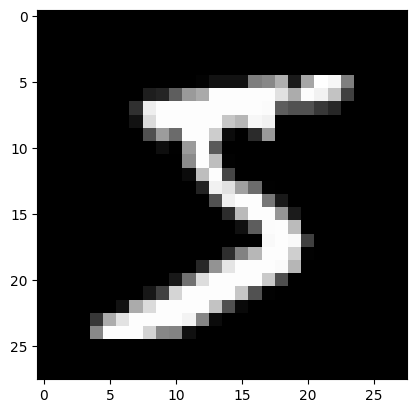

-----------------
0


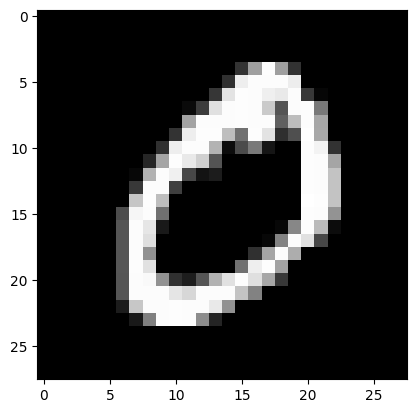

In [6]:
for i in range(2):
    image = x_train[i]
    image = np.array(image, dtype='float')
    label = y_train[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()
    

## Convert MNIST Training Samples to Images

In this code cell, we'll convert a selection of MNIST training samples into image files. The MNIST dataset consists of handwritten digits represented as pixel values. We will convert these pixel values into image files to visualize and inspect them.

The code below accomplishes the following steps:

1. **Import Libraries**: We import necessary libraries, including `matplotlib` for image manipulation.

2. **Image Conversion Loop**: We iterate through a selection of MNIST training samples (from 1 to 9) and convert them into image files.

3. **Save Images**: Each converted image is saved with a filename that indicates its order in the loop (e.g., `image_no_1.png`, `image_no_2.png`, etc.).

Feel free to run this code cell to generate the images and explore the handwritten digits visually. It can be a helpful step for better understanding the dataset and preprocessing.


In [7]:
from matplotlib import image
for i in range(1,10):
    png = x_train[i]
    png = np.array(png, dtype='float')
    pixels = png.reshape((28, 28))
    image.imsave('image_no_{}.png'.format(i), pixels, cmap = 'gray')

In [8]:
import os
print(os.listdir())

['image_no_1.png', 'MNIST with CNN.ipynb', 'image_no_2.png', 'image_no_5.png', 'pima-indians-diabetes.csv', 'image_no_3.png', 'image_no_8.png', 'derby.log', 'image_no_6.png', 'image_no_7.png', '.ipynb_checkpoints', 'image_no_4.png', 'image_no_9.png']


## Python Code: Setting up a Convolutional Neural Network (CNN) for MNIST Classification

In this section, we will define and configure a Convolutional Neural Network (CNN) using TensorFlow and Keras for the task of classifying the MNIST dataset. The CNN architecture consists of convolutional layers, activation functions, and fully connected layers to learn and make predictions on handwritten digits.

We will perform the following steps in the code cell below:
1. Import necessary libraries and modules from TensorFlow and Keras.
2. Define the architecture of the CNN model.
3. Configure the model's optimizer and compile it.
4. Prepare the data for training and evaluation.

Let's begin by setting up our CNN model for MNIST digit classification:


In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

## Data Preprocessing

Before we can train a Convolutional Neural Network (CNN) to classify the MNIST dataset, we need to perform some essential data preprocessing steps. This section of the notebook focuses on preparing the data for training and testing the model.

### Reshaping the Data

The MNIST dataset originally consists of 28x28 pixel grayscale images. To work with CNNs, we need to reshape the input data to have a 4D shape, where the dimensions represent the number of samples, height, width, and channels (in this case, 1 for grayscale). We'll also normalize the pixel values to fall within the range [0, 1].


In [10]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

60000 train samples
10000 test samples


In [11]:
print(y_train[0].shape)

(10,)


## Convolutional Neural Network (CNN) Model Definition

In the following code cell, we define a Convolutional Neural Network (CNN) for the MNIST digit classification task. This CNN architecture is designed to learn and classify handwritten digits from the MNIST dataset.

Here's a brief overview of the architecture:

- We start with a 2D convolutional layer with 32 filters and a kernel size of (5, 5).
- The activation function used after the convolutional layer is Rectified Linear Unit (ReLU), which introduces non-linearity to the model.
- Next, we flatten the output from the convolutional layer to prepare it for fully connected layers.
- We add a fully connected (dense) layer with 128 neurons followed by a ReLU activation.
- Finally, we have another dense layer with 10 neurons, which corresponds to the 10 possible digit classes (0-9), and we use a sigmoid activation function to produce class probabilities.

This CNN architecture is a common choice for image classification tasks and should work well for the MNIST dataset. Let's proceed with defining and training the model.


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

## Compiling the Model

Before we start training our neural network, we need to compile it. Compilation involves specifying important details about how the model should be trained. In this code cell, we are using the `model.compile` method to configure the training process. Here's a breakdown of what's happening:

- **Optimizer**: We are using the Adam optimizer, which is a popular choice for training neural networks. The optimizer adjusts the model's weights during training to minimize the loss function.

- **Loss Function**: We are using 'categorical_crossentropy' as our loss function. This is a common choice for multi-class classification problems like MNIST. It measures the difference between the predicted class probabilities and the true class labels.

- **Metrics**: We are monitoring the 'accuracy' metric during training. This metric helps us assess how well the model is performing in terms of correctly classifying digits.

Now that we've compiled the model, we can proceed with training it on the MNIST dataset to teach it how to recognize handwritten digits.


In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Model Training

In this section, we will train our Convolutional Neural Network (CNN) model on the MNIST dataset. The training process involves feeding the training data (images of handwritten digits) to the model and iteratively updating its parameters to improve its performance. We will specify the following training parameters:

- `batch_size`: The number of samples to be used in each training iteration.
- `epochs`: The number of times the entire training dataset will be passed through the model.
- `validation_data`: The data used to evaluate the model's performance during training. This helps us monitor how well the model generalizes to data it hasn't seen during training.

Let's proceed with training the model:
```python
model.fit(x_train, y_train, batch_size=512, epochs=5, validation_data=(x_test, y_test))


In [14]:
model.fit(x_train,y_train,batch_size=512,
          epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
118/118 [==============================] - 20s 100ms/step - loss: 0.2749 - accuracy: 0.9218 - val_loss: 0.0987 - val_accuracy: 0.9706
Epoch 2/5
118/118 [==============================] - 12s 99ms/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 0.0634 - val_accuracy: 0.9802
Epoch 3/5
118/118 [==============================] - 12s 99ms/step - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 4/5
118/118 [==============================] - 12s 99ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0530 - val_accuracy: 0.9828
Epoch 5/5
118/118 [==============================] - 12s 99ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0507 - val_accuracy: 0.9837


## Model Evaluation

In this section, we will evaluate the performance of our trained model on the test dataset. We will calculate two important metrics:
1. **Accuracy**: This metric measures the percentage of correctly classified digits in the test dataset.
2. **Loss**: The loss function indicates how well our model's predictions align with the true labels.


In [15]:
stats = model.evaluate(x_test, y_test)
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9837
The accuracy rate is 98.4%
The loss rate is 5.0%


## Model Summary

In this section, we'll take a closer look at the architecture and parameters of our neural network model using `model.summary()`. This function provides a concise summary of the layers in the model, including details about the number of parameters, layer types, and output shapes.

Understanding the model summary is crucial for verifying that your neural network is structured as intended and to identify potential issues such as overfitting or underfitting.

Let's proceed to examine the summary of our neural network model:


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

## Visualizing Convolutional Filters in a Neural Network

In this code section, we will visualize the convolutional filters in the first layer of our neural network. Understanding these filters can provide insights into what features the neural network has learned to detect in the input data.

We will accomplish this by performing the following steps:
1. **Accessing Filter Weights**: We will access the weights of the first convolutional layer in our model using `model.layers[0].get_weights()`.
2. **Normalization**: We will normalize the filter weights to ensure they are in the range [0, 1].
3. **Visualization**: We will visualize the normalized filter weights to see what patterns or features the neural network has learned to recognize.

Let's proceed with visualizing the filters!


In [17]:
filters, biases = model.layers[0].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

(5, 5, 1, 32)


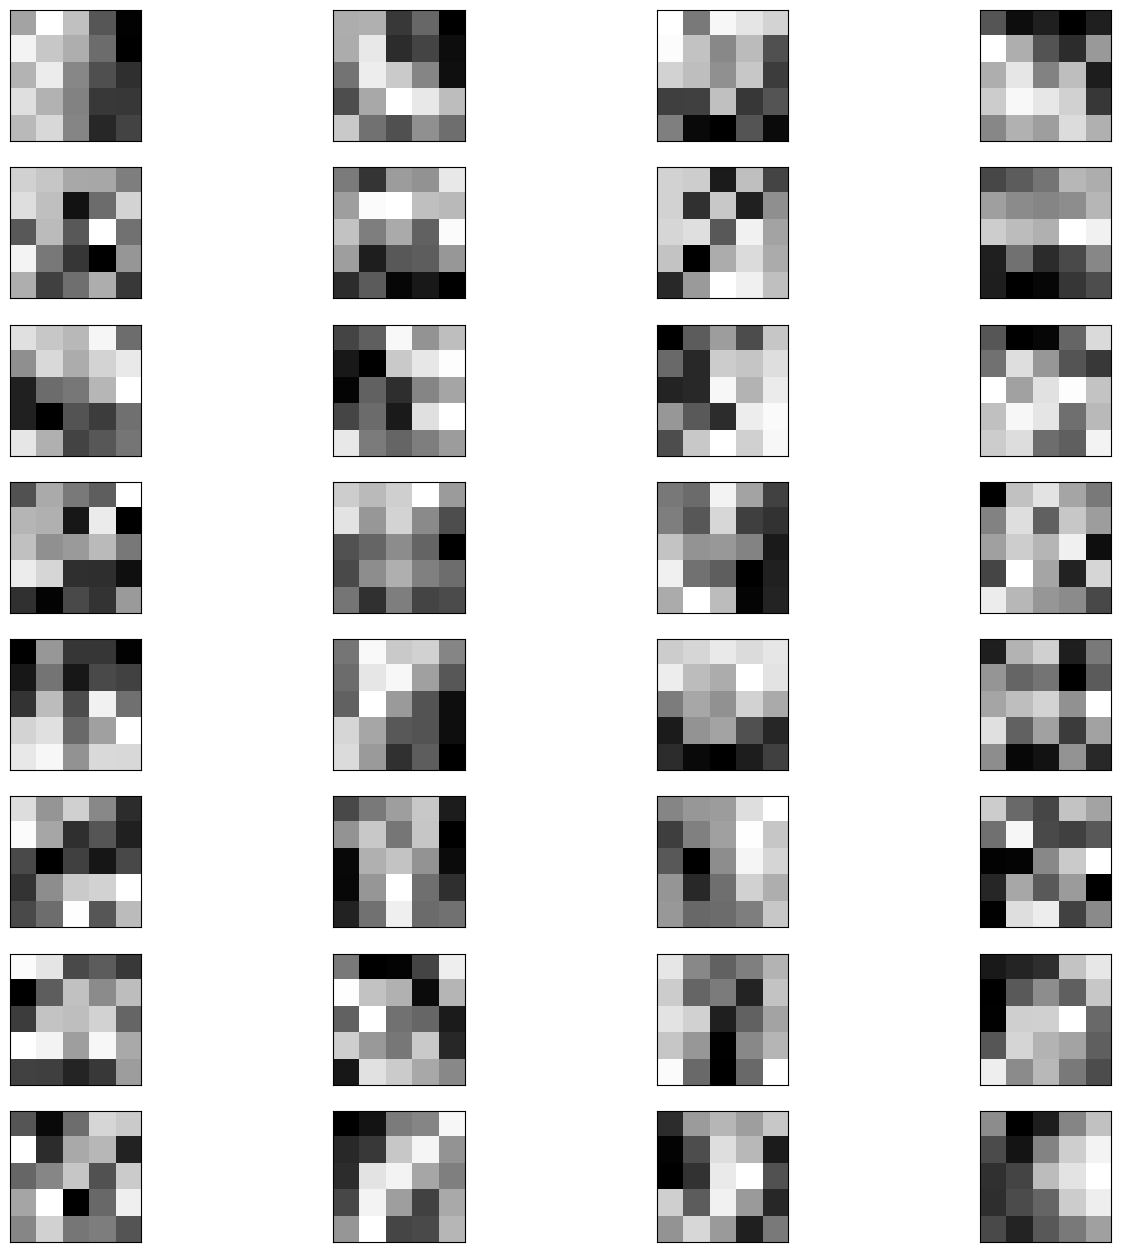

In [18]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    
    # specify subplot and turn of axis
    ax = plt.subplot(8, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :], cmap='gray')
    ix = ix + 1
# show the figure
plt.show()

## Extracting Feature Maps from a CNN Model

In this code cell, we will demonstrate how to extract feature maps from a Convolutional Neural Network (CNN) model using Keras. Feature maps are intermediate representations of the input data after passing through certain layers of the CNN.

The following code accomplishes the following steps:

1. **Feature Model**: We create a new model, `feature_model`, which takes the same input as the original `model` but outputs the activations from a specific layer. In this case, we are extracting the activations from `model.layers[1]`, which is typically a convolutional layer. You can change this index to extract feature maps from other layers as needed.

2. **Predict Feature Maps**: We use `feature_model.predict()` to obtain the feature maps for a specific input. Here, we are using `x_test[125:126]` as the input data, which is a single sample from the test dataset.

3. **Printing Shape**: Finally, we print the shape of the extracted feature maps to understand their dimensions.

You can modify this code to extract feature maps from your own CNN model and input data as needed.


In [20]:
feature_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [21]:
feature_maps = feature_model.predict(x_test[125:126])
print((feature_maps.shape))

1/1 [==============================] - 0s 40ms/step
(1, 24, 24, 32)


## Visualizing Feature Maps

In this section, we will visualize the feature maps generated by a convolutional neural network (CNN). Feature maps are representations of learned features in the input data, and visualizing them can help us understand what the network is learning at different layers.

The code below generates a grid of feature maps from a specific layer of the CNN. Each feature map corresponds to a specific learned filter in the convolutional layer. We will use these feature maps to gain insights into how the CNN processes input images and extracts meaningful patterns.

Let's go ahead and visualize the feature maps!


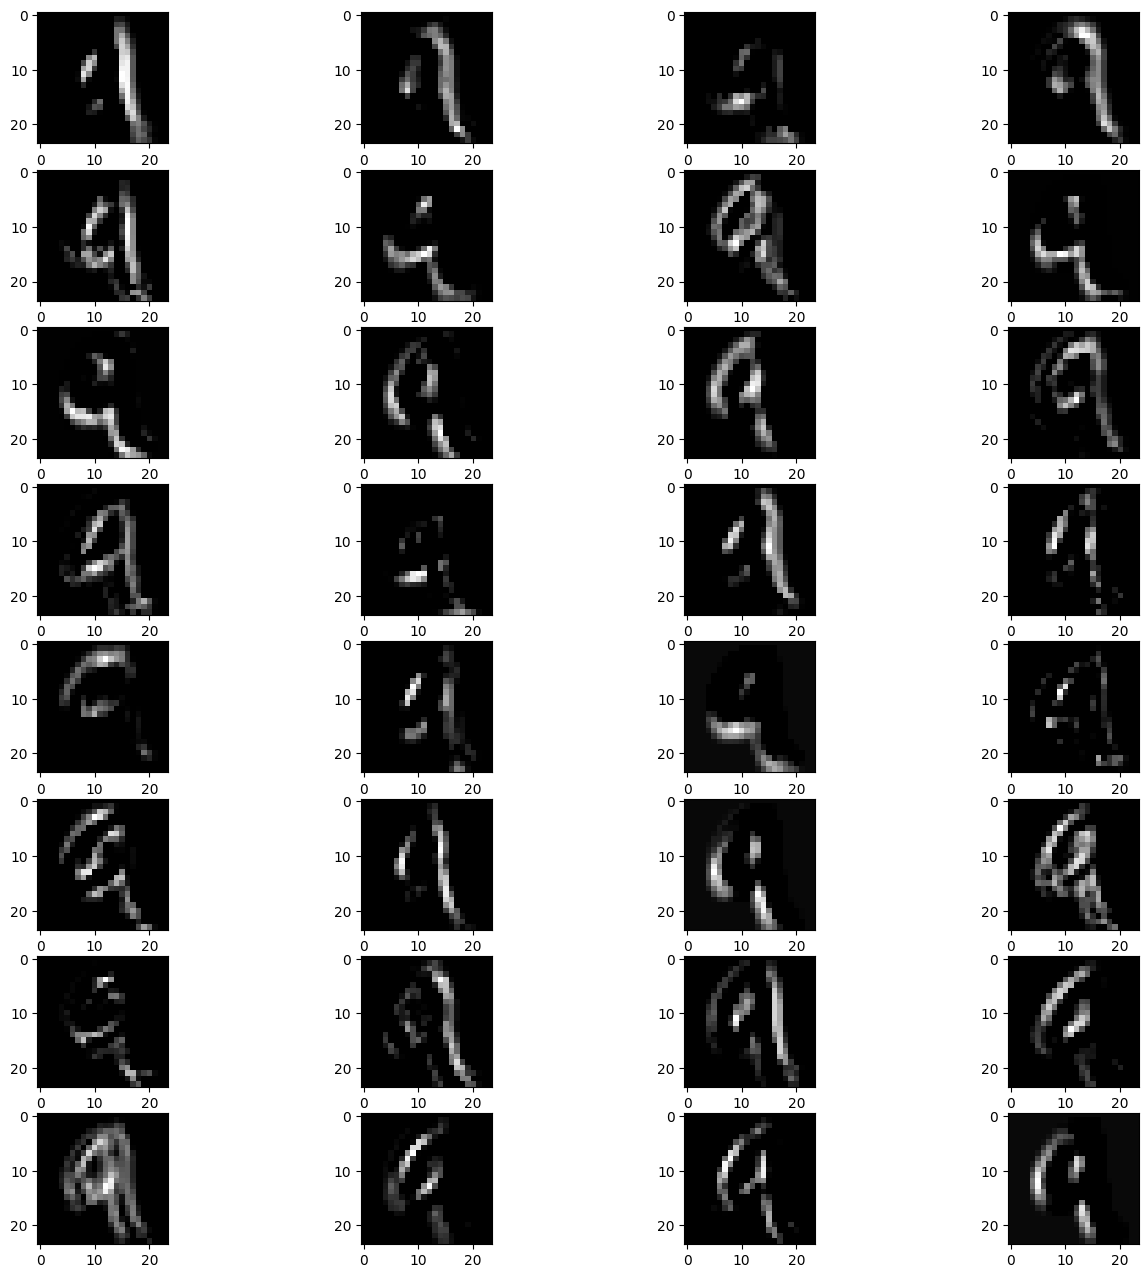

In [22]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
     ax = plt.subplot(8, 4, ix)
	#ax.set_xticks([])
	#ax.set_yticks([])
     plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
     ix += 1
plt.show()

## Understanding a Slice of the Test Labels

In this section, we will take a closer look at a specific slice of the test labels (`y_test`). The code cell below will display the label at index 125 of the test dataset.

This can be helpful for debugging or gaining insights into the dataset. Let's proceed to view the label at index 125.


In [23]:
y_test[125:126]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)